<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize': (11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas: 

__1.__ Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?

Se puede ver claramente en los siguientes gráficos que todos los grupos son muy distintos, puesto que tienen diferentes comportamientos, lineal, cuadratica, etc.

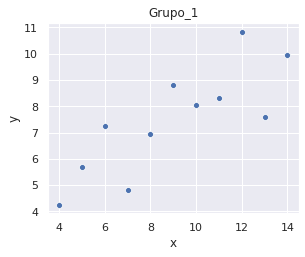

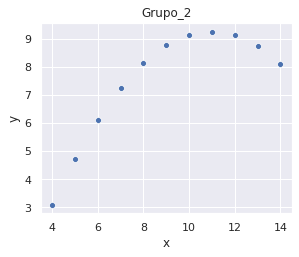

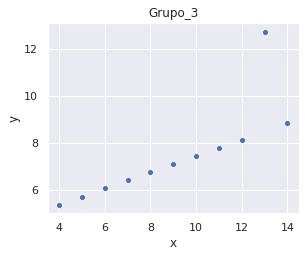

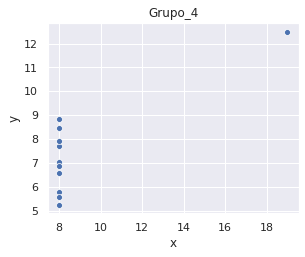

In [3]:
sns.set(rc={'figure.figsize':(4.5,3.5)})

#Obtenemos la cantidad de grupos
groups = df['grupo'].unique()
len_groups = len(groups)  #Nos servira de aquí en adelante

#Hacemos una mascara por grupo
masks = [df['grupo'] == i for i in groups]

#Dataframe por grupo
df_groups = [df[i] for i in masks]


#Graficamos cada grupo

for i in range(0, len_groups):
    sns.scatterplot(
    x = 'x',
    y = 'y',
    data = df_groups[i]
    )
    plt.title(groups[i])
    plt.show()

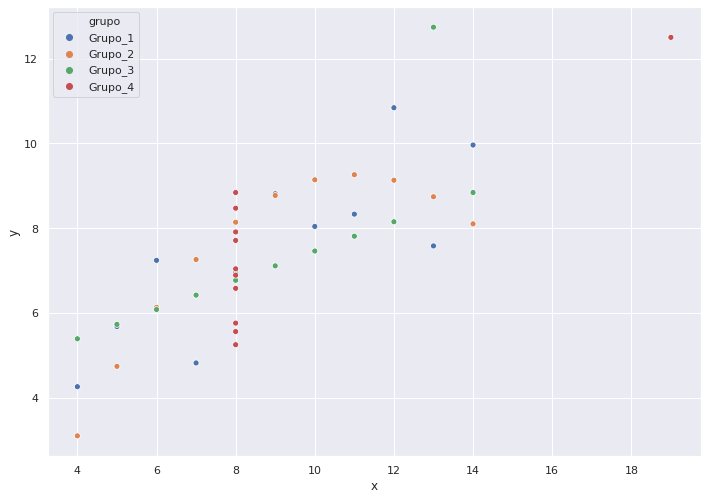

In [4]:
sns.set(rc={'figure.figsize': (11.7,8.27)})

#Graficamos los grupos igual que antes, pero todos juntos
sns.scatterplot(
    x = 'x',
    y = 'y',
    data = df,
    hue = 'grupo'
)  
plt.show()

__2.__ Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.

In [5]:
for i in range(0,len_groups):   #Se presenta la descripción de cada grupo
    print('\nGrupo', i + 1)
    print(df_groups[i].describe())


Grupo 1
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000

Grupo 2
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000

Grupo 3
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000

Grupo 4
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250000
25%     8.000000   6.170000
50%     8.000000   7.040000
75%     8.00

Dado que en los **4** grupos, se tienen **11** datos para los valores _x_ e _y_, y considerando el promedio de ambas variables y su desviación estándar, uno esperaría que estos fueran muy parecidos y/o que se comportaran de la misma manera, pero por lo visto en los gráficos de dispersión esto no es así.

__3.__ Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

In [6]:
#Importamos herramientas para la regresión
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#Datos por grupo de x e y
X_g1 = df_groups[0][['x']]
y_g1 = df_groups[0]['y']
X_g2 = df_groups[1][['x']]
y_g2 = df_groups[1]['y']
X_g3 = df_groups[2][['x']]
y_g3 = df_groups[2]['y']
X_g4 = df_groups[3][['x']]
y_g4 = df_groups[3]['y']


# Training_set y test_set por grupo
X_g1_train,X_g1_test,y_g1_train,y_g1_test=train_test_split(X_g1, y_g1, test_size=0.2, random_state=42)
X_g2_train,X_g2_test,y_g2_train,y_g2_test=train_test_split(X_g2, y_g2, test_size=0.2, random_state=42)
X_g3_train,X_g3_test,y_g3_train,y_g3_test=train_test_split(X_g3, y_g3, test_size=0.2, random_state=42)
X_g4_train,X_g4_test,y_g4_train,y_g4_test=train_test_split(X_g4, y_g4, test_size=0.2, random_state=42)


#Creando modelo
model_rl = LinearRegression()

#Parametros
beta_groups_0 = []
beta_groups_1 = []

#Modelos
#Grupo 1
model_rl.fit(X_g1_train, y_g1_train)
beta_groups_0.append(round(model_rl.intercept_,2))
beta_groups_1.append(round(model_rl.coef_[0],2))

#Grupo 2
model_rl.fit(X_g2_train, y_g2_train)
beta_groups_0.append(round(model_rl.intercept_,2))
beta_groups_1.append(round(model_rl.coef_[0],2))

#Grupo 3
model_rl.fit(X_g3_train, y_g3_train)
beta_groups_0.append(round(model_rl.intercept_,2))
beta_groups_1.append(round(model_rl.coef_[0],2))

#Grupo 4
model_rl.fit(X_g4_train, y_g4_train)
beta_groups_0.append(model_rl.intercept_)
beta_groups_1.append(model_rl.coef_[0])

for i in range(0, len_groups):
    print(f"El mejor ajuste lineal para el grupo {i+1} viene dado por la recta: \n\n     \
    y = {round(beta_groups_0[i],2)} + {round(beta_groups_1[i],2)}*x\n")


El mejor ajuste lineal para el grupo 1 viene dado por la recta: 

         y = 3.47 + 0.47*x

El mejor ajuste lineal para el grupo 2 viene dado por la recta: 

         y = 1.92 + 0.63*x

El mejor ajuste lineal para el grupo 3 viene dado por la recta: 

         y = 2.46 + 0.59*x

El mejor ajuste lineal para el grupo 4 viene dado por la recta: 

         y = 2.87 + 0.51*x



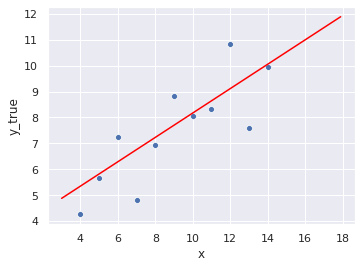

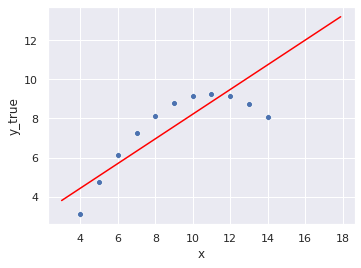

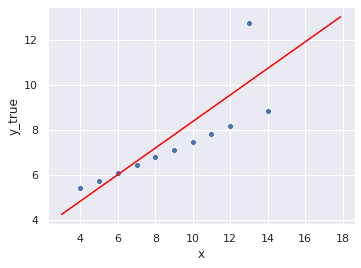

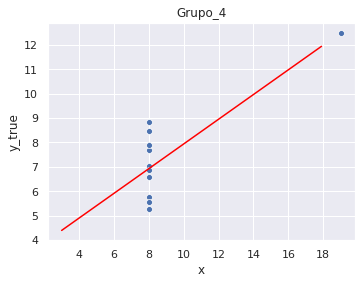

In [7]:
#Predicciones por grupo
y_g1_predict = model_rl.predict(X_g1_test)
y_g2_predict = model_rl.predict(X_g2_test)
y_g3_predict = model_rl.predict(X_g3_test)
y_g4_predict = model_rl.predict(X_g4_test)

#Datas para graficar

x_range = np.arange(3,18,0.1)
        
df_g1_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_groups_0[0] + beta_groups_1[0]*n for n in x_range]})
df_g2_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_groups_0[1] + beta_groups_1[1]*n for n in x_range]})
df_g3_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_groups_0[2] + beta_groups_1[2]*n for n in x_range]})
df_g4_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_groups_0[3] + beta_groups_1[3]*n for n in x_range]})

#Mas que nada para graficar en un for y ahorrar lineas de codigo
df_plot = [df_g1_plot, df_g2_plot, df_g3_plot, df_g4_plot]


#Datas para graficar
df_groups[0] = pd.DataFrame({'x':X_g1['x'],
                           'y':y_g1})
df_groups[1] = pd.DataFrame({'x':X_g2['x'],
                           'y':y_g2})
df_groups[2] = pd.DataFrame({'x':X_g3['x'],
                           'y':y_g3})
df_groups[3] = pd.DataFrame({'x':X_g4['x'],
                           'y':y_g4})

#Figuras y para ahorrar lineas de codigo
fig_g1, ax_g1 = plt.subplots(figsize=(5.5, 4))
fig_g2, ax_g2 = plt.subplots(figsize=(5.5, 4))
fig_g3, ax_g3 = plt.subplots(figsize=(5.5, 4))
fig_g4, ax_g4 = plt.subplots(figsize=(5.5, 4))
ax = [ax_g1, ax_g2, ax_g3, ax_g4]
        
#Graficos por grupo
for i in range(0,len_groups):
    sns.scatterplot(x='x', y='y', data=df_groups[i], ax=ax[i])
    sns.lineplot(x='x', y='y_true', data=df_plot[i],ax=ax[i],color="red")
    plt.title(groups[i])


Se puede notar, que en los grupos **3** y **4** un dato aislado puede cambiar la trayectoria de la función considerablemente. Por otro lado, para el grupo **1** esta podría ser una buena regresión dada los datos, mientras que para el grupo **2** claramente se le podría hacer una regresión con otro tipo de función, cuadratica por ejemplo.

__4.__ Calcule los resultados de las métricas para cada grupo. Interprete.

In [8]:
#Primero importamos las medidas que estan en el archivo metrics_regression.py

from metrics_regression import *
from sklearn.metrics import r2_score

#Datas con los test y la prediccion
df_g1_temp = pd.DataFrame({'y':y_g1_test,
                           'yhat': model_rl.predict(X_g1_test)
                        })
df_g2_temp = pd.DataFrame({'y':y_g2_test,
                           'yhat': model_rl.predict(X_g2_test)
                        })
df_g3_temp = pd.DataFrame({'y':y_g3_test,
                           'yhat': model_rl.predict(X_g3_test)
                        })
df_g4_temp = pd.DataFrame({'y':y_g4_test,
                           'yhat': model_rl.predict(X_g4_test)
                        })
df_temp = [df_g1_temp, df_g2_temp, df_g3_temp, df_g4_temp]
df_metrics = []

#Calculo de metricas 
for i in range(0, len_groups):
    df_metrics.append(summary_metrics(df_temp[i]))

#Agregamos r2 a las metricas
df_metrics[0]['r2'] =  round(r2_score(y_g1_test, model_rl.predict(X_g1_test)),4)
df_metrics[1]['r2'] =  round(r2_score(y_g2_test, model_rl.predict(X_g2_test)),4)
df_metrics[2]['r2'] =  round(r2_score(y_g3_test, model_rl.predict(X_g3_test)),4)
df_metrics[3]['r2'] =  round(r2_score(y_g4_test, model_rl.predict(X_g4_test)),4)

for i in range(0, len_groups):
    print('\nMetricas para el regresor del grupo',i+1)
    print(df_metrics[i])


Metricas para el regresor del grupo 1
      mae     mse   rmse   mape   maape   wmape   mmape   smape      r2
0  0.5687  0.8556  0.925  0.115  0.1112  0.0748  0.0955  0.0993  0.8097

Metricas para el regresor del grupo 2
      mae     mse    rmse    mape   maape   wmape   mmape   smape     r2
0  1.3027  1.8773  1.3702  0.1592  0.1575  0.1595  0.1418  0.1567 -2.175

Metricas para el regresor del grupo 3
      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.5355  0.4994  0.7066  0.0639  0.0637  0.0707  0.0571  0.0607  0.4917

Metricas para el regresor del grupo 4
      mae     mse    rmse    mape   maape   wmape   mmape   smape      r2
0  0.4814  0.3671  0.6059  0.0644  0.0642  0.0671  0.0568  0.0668 -0.2071


En el $R^2$ se puede notar que el grupo **1** es el más cercano a **1**, seguido del grupo **3**, el cual no es muy acertado, por lo mencionado anteriormente, que es ese dato aislado que se encuentra, pero se puede notar un claro error en los grupos **2** y **4**, en donde tal valor es negativo. Esto tambien queda claro en lo que sigue:



In [9]:
import statsmodels.api as sm

model = sm.OLS(y_g1_train, sm.add_constant(X_g1_train))
results = model.fit()
print('Grupo 1\n')
print(results.summary())

Grupo 1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     9.834
Date:                Thu, 05 Nov 2020   Prob (F-statistic):             0.0202
Time:                        21:16:12   Log-Likelihood:                -12.443
No. Observations:                   8   AIC:                             28.89
Df Residuals:                       6   BIC:                             29.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4668      1.357      2.555

/home/pablo/anaconda3/envs/mat281/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [10]:
model = sm.OLS(y_g2_train, sm.add_constant(X_g2_train))
results = model.fit()
print('Grupo 2\n')
print(results.summary())

Grupo 2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     26.13
Date:                Thu, 05 Nov 2020   Prob (F-statistic):            0.00220
Time:                        21:16:12   Log-Likelihood:                -10.838
No. Observations:                   8   AIC:                             25.68
Df Residuals:                       6   BIC:                             25.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9240      1.110      1.733

In [11]:
model = sm.OLS(y_g3_train, sm.add_constant(X_g3_train))
results = model.fit()
print('Grupo 3\n')
print(results.summary())

Grupo 3

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     14.71
Date:                Thu, 05 Nov 2020   Prob (F-statistic):            0.00860
Time:                        21:16:12   Log-Likelihood:                -12.655
No. Observations:                   8   AIC:                             29.31
Df Residuals:                       6   BIC:                             29.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4553      1.393      1.762

In [12]:
model = sm.OLS(y_g4_train, sm.add_constant(X_g4_train))
results = model.fit()
print('Grupo 4\n')
print(results.summary())

Grupo 4

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     12.85
Date:                Thu, 05 Nov 2020   Prob (F-statistic):             0.0116
Time:                        21:16:12   Log-Likelihood:                -13.199
No. Observations:                   8   AIC:                             30.40
Df Residuals:                       6   BIC:                             30.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8717      1.422      2.020

__5.__ Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario. 

Para el grupo **2**, se puede cambiar de modelo, notemos que se usa una proporcion de test alto, para los pocos datos que se tiene, y la regresión es bastante buena.

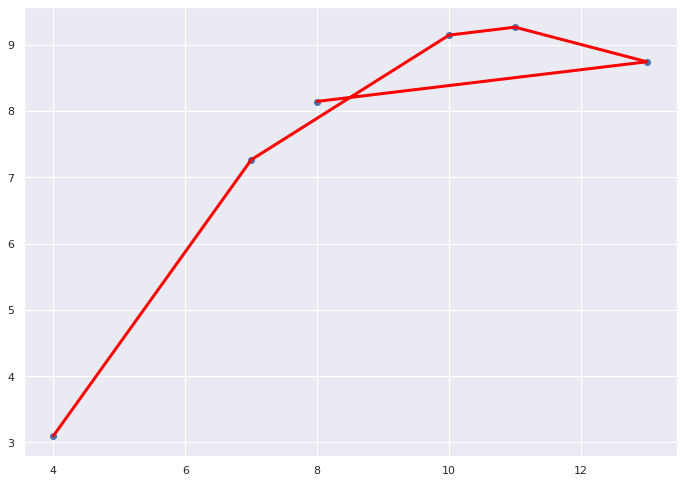

In [13]:
#Regresion polinomica
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

#Training y test
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_g2, y_g2, test_size=0.5, random_state= 18)

#Modelo
poli_reg = PolynomialFeatures(degree = 2)
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)
pr = linear_model.LinearRegression()
pr.fit(X_train_poli, y_train_p)
Y_pred_pr = pr.predict(X_test_poli)

#Grafico
plt.scatter(X_test_p, y_test_p)
plt.plot(X_test_p, Y_pred_pr, color='red', linewidth=3)
plt.show()

Para el grupo **3**, se debe eliminar el _outliers_, que en primera instancia es el unico dato donde $y > 12$.

Text(0.5, 1.0, 'Grupo 3')

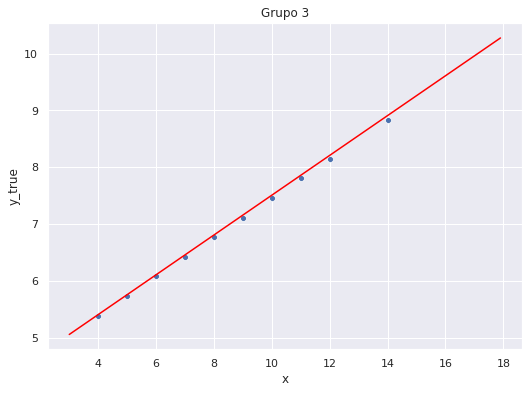

In [14]:
#Data sin el outlier
mask = (df_groups[2]['y'] < 12)
df_g3 = df_groups[2][mask]

#Todo lo necesario para la nueva regresion lineal

X_g3 = df_g3[['x']]
y_g3 = df_g3['y']

#Training y Test
X_g3_train,X_g3_test,y_g3_train,y_g3_test=train_test_split(X_g3, y_g3, test_size=0.2, random_state=42)

#Modelo
model_rl = LinearRegression()
model_rl.fit(X_g3_train, y_g3_train)

#Parametros
beta_g3_0 = round(model_rl.intercept_,2)
beta_g3_1 = round(model_rl.coef_[0],2)

#Prediccion y data para graficar
y_g3_predict = model_rl.predict(X_g3_test)
df_g3_plot = pd.DataFrame({'x':x_range,
                        'y_true':[beta_g3_0 + beta_g3_1*n for n in x_range]})

#Graficar
fig_g3, ax_g3 = plt.subplots(figsize=(8.5, 6))
sns.scatterplot(x='x', y='y', data=df_g3, ax=ax_g3)
sns.lineplot(x='x', y='y_true', data=df_g3_plot,ax=ax_g3,color="red")
plt.title('Grupo 3')

Para el grupo **4**, se ve que no es posible realizar una regresion lineal si es que se retira el outlier en este.